Data project:

CAPM - financial data

Choose 2 stocks and market (SP-500)
1. Data
- Import stock data from csv/api
- Merge stock data together
- Calculate expected return matrix
- Calculate covariance matrix

2. CAPM Regression
- Calculate stock regression.

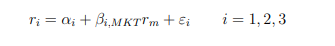

- What is the market exposure/risk premium (Betas)
- Does CAPM hold? (Is alpha = 0)

3. CAPM: Portfolio
- Find Minimum variance portfolio and Efficient tangent portfolio (Highest sharpe ratio).
- Plot portfolios in volatility-return diagram.



In [2]:
import yfinance as yf
import pandas as pd
import numpy as np


## 1.1) Importing data

In [3]:
data = yf.download(["^GSPC", "NVO", "MSFT"], start = "2020-01-01", end = "2024-04-08", interval = "1mo")
#data = data.iloc[:, :2]
data = data["Adj Close"]

data['sp500_returns'] = data['^GSPC'].pct_change() * 100
data["msft_returns"] = data["MSFT"].pct_change() * 100
data["nvo_returns"] = data["NVO"].pct_change() * 100
data = data.dropna()

print(data)

[*********************100%%**********************]  3 of 3 completed

Ticker            MSFT         NVO        ^GSPC  sp500_returns  msft_returns  \
Date                                                                           
2020-02-01  155.830811   27.309950  2954.219971      -8.411048     -4.828759   
2020-03-01  152.109161   28.282450  2584.590088     -12.511928     -2.388263   
2020-04-01  172.845627   29.752953  2912.429932      12.684404     13.632621   
2020-05-01  176.742126   30.979151  3044.310059       4.528182      2.254324   
2020-06-01  196.829300   30.763044  3100.290039       1.838840     11.365244   
2020-07-01  198.280014   30.692570  3271.120117       5.510132      0.737042   
2020-08-01  218.126419   31.026131  3500.310059       7.006467     10.009282   
2020-09-01  203.917191   32.873466  3363.000000      -3.922797     -6.514217   
2020-10-01  196.296799   30.250414  3269.959961      -2.766579     -3.737003   
2020-11-01  207.543121   31.784473  3621.629883      10.754564      5.729244   
2020-12-01  216.203064   33.072334  3756

## 1.2 Return and covariance matrix

In [4]:
returns = data.iloc[:, [4,5]]
return_matrix = np.mean(returns, axis = 0)
print(return_matrix)

Ticker
msft_returns    2.083592
nvo_returns     3.110162
dtype: float64


In [5]:
cov_matrix = returns.cov()
print(cov_matrix)

Ticker        msft_returns  nvo_returns
Ticker                                 
msft_returns     42.703475    20.404266
nvo_returns      20.404266    36.678026


## 3 Portfolios

In [8]:
def portfolio(return_matrix, cov_matrix, x):
    w = pd.DataFrame([x, 1-x], index=['msft_returns', 'nvo_returns'])
    tw = w.transpose()
    var = tw.dot(cov_matrix).dot(w)
    sd = np.sqrt(var)[0][0]
    
    e_r = tw.dot(return_matrix)[0]

    return e_r, sd

In [12]:
er, sd = portfolio(return_matrix, cov_matrix, 0)

print(f'Expected return = {er:.3f}, Expected volatility = {sd:.3f}')

Expected return = 3.110, Expected volatility = 6.056


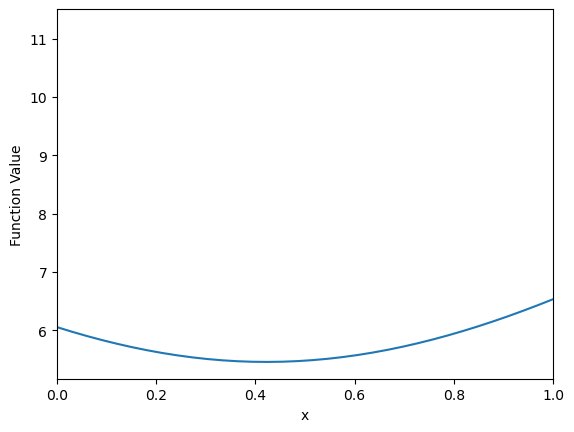

In [42]:
import matplotlib.pyplot as plt
import numpy as np

# Define the function

# Generate the values for x, y, and z
x_values = np.linspace(-1, 2, 100)  # Varying values for the third input

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the values of the function for each z value
function_values = []

for x in x_values:
    # Calculate the function values
    function_values.append(portfolio(return_matrix, cov_matrix, x)[1]) 
    
    # Plot the function values
    
ax.plot(x_values, function_values)
# Add labels and a legend
ax.set_xlabel('x')
ax.set_ylabel('Function Value')

ax.set_xlim(0, 1)
plt.show()


## Minimum Variance Portfolio

In [59]:
def mvp(return_matrix, cov_matrix, N):
    N = N
    x_vec = np.linspace(-1, 2, N)
    vol_best = np.inf
    x_best = 0
    for x in x_vec:
        vol = portfolio(return_matrix, cov_matrix, x)[1]
        if vol < vol_best:
            vol_best = vol
            x_best = x
    return x_best

x_min = mvp(return_matrix, cov_matrix, 1000)

In [62]:
mvp = portfolio(return_matrix, cov_matrix, x_min)
print(f'MVP return = {mvp[0]:.3f}, MVP volatility = {mvp[1]:.3f}')

MVP return = 2.679, MVP volatility = 5.460


## Efficient Tangent Portfolio

Efficient markeds rand;

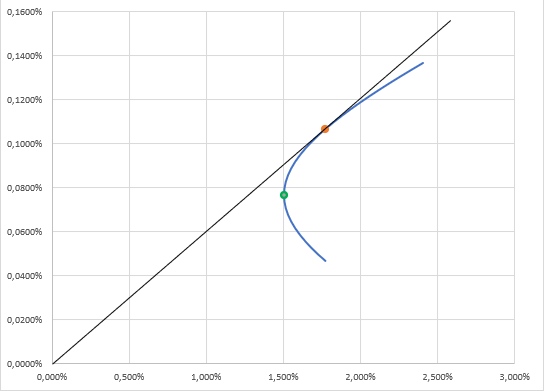